---
## Import packages and libraries
---

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

from sentiment_analysis.preprocessing import readData
from vectorizer_tfidf import reviewTfidfVectorizer

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report

In [3]:
sentences = readData("sentiment_analysis/corpus.txt")
len(sentences)

528287

---
## Vectorizer
---

### Uni-gram

In [3]:
vectorizer = reviewTfidfVectorizer()
vectorizer.fit(sentences)

### Save Uni-gram TF_IDF

In [ ]:
joblib.dump(vectorizer, 'vec_models/review_tfidf_vectorizer.pkl')

['model/review_tfidf_vectorizer.pkl']

---
## Sentiment
---

### Transform Data

In [4]:
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

In [5]:
vocabulary = vectorizer.vocabulary_
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  9593


In [6]:
df = pd.read_csv("sentiment_analysis/IMDB Dataset.csv")
X_train, X_temp, y_train, y_temp = train_test_split(df["review"], df["sentiment"], test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

In [7]:
x_train_tfidf = vectorizer.transform(X_train.tolist()).toarray()

### MaxEnt (Ridge Regression)

In [8]:
ridge_classifier = RidgeClassifier()

In [ ]:
# Define the parameter grid for grid search
param_grid = {'alpha':  np.arange(0.1, 1.1, 0.1)}

# Perform grid search
grid_search = GridSearchCV(ridge_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

In [9]:
ridge_classifier = RidgeClassifier(alpha=0.2)
ridge_classifier.fit(x_train_tfidf, y_train)

RidgeClassifier(alpha=0.2)

In [12]:
x_dev_tfidf = vectorizer.transform(X_dev.tolist()).toarray()
ridge_predictions = ridge_classifier.predict(x_dev_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_dev, ridge_predictions))

ridge_accuracy = accuracy_score(y_dev, ridge_predictions)
ridge_precision = precision_score(y_dev, ridge_predictions, average="weighted")
ridge_recall = recall_score(y_dev, ridge_predictions, average="weighted")
ridge_f1 = f1_score(y_dev, ridge_predictions, average="weighted")

print("Accuracy: ", ridge_accuracy)
print("Precision: ", ridge_precision)
print("Recall: ", ridge_recall)
print("F1-Score: ", ridge_f1)

Confusion Matrix:
[[2039  449]
 [ 408 2204]]
Accuracy:  0.8319607843137254
Precision:  0.8319809433694085
Recall:  0.8319607843137254
F1-Score:  0.8319170328170467


In [13]:
ridge_result = classification_report(y_dev, ridge_predictions)
print(ridge_result)

              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      2488
    positive       0.83      0.84      0.84      2612

    accuracy                           0.83      5100
   macro avg       0.83      0.83      0.83      5100
weighted avg       0.83      0.83      0.83      5100



<Axes: >

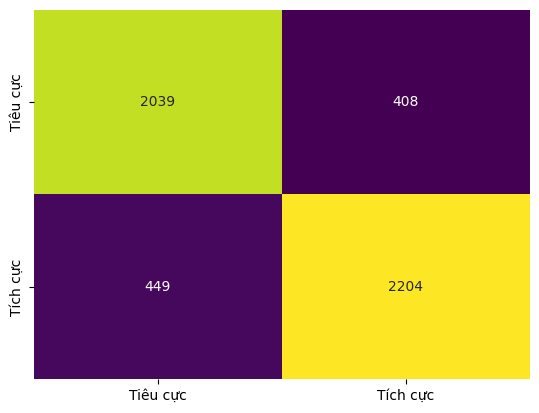

In [14]:
ridge_conf_matrix = confusion_matrix(ridge_predictions, y_dev)
sns.heatmap(ridge_conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Tiêu cực", "Tích cực"], yticklabels=["Tiêu cực", "Tích cực"])

In [15]:
result_df_MNB = pd.DataFrame({
    'text': X_dev,
    'true_label': y_dev,
    'predicted_label': ridge_predictions
})
result_df_MNB.head(10)

,text,true_label,predicted_label
18172,There is something special about the Austrian ...,positive,negative
10368,For those who are too young to know this or fo...,negative,negative
24841,"My friends and I rented this for ""Bad Movie Ni...",negative,negative
20763,I guess my husband and I are a little slow. We...,positive,positive
35087,Obviously made to show famous 1950s stripper M...,negative,positive
9266,"Shot entirely on location in Bulgaria, The Man...",positive,positive
37273,"This movie is a absolute masterpiece!, 'Tromeo...",positive,positive
10986,I went in to this movie thinking it was going ...,negative,negative
36311,"<br /><br />Ok, well I rented this movie while...",negative,positive
22969,"**SPOILERS**KHAMOSH is totally unrealistic, la...",negative,negative


In [16]:
example = "The plot twtist is really good, but the cgi is so terrible."
vector = vectorizer.transform([example]).toarray()
result = ridge_classifier.predict(vector)
print("Sentiment: ", result)

Sentiment:  ['negative']


### SVM

In [17]:
SVM_classifier = SVC()
SVM_classifier.fit(x_train_tfidf, y_train)

SVC()

In [20]:
SVM_predictions = SVM_classifier.predict(x_dev_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_dev, SVM_predictions))

SVM_accuracy = accuracy_score(y_dev, SVM_predictions)
SVM_precision = precision_score(y_dev, SVM_predictions, average="weighted")
SVM_recall = recall_score(y_dev, SVM_predictions, average="weighted")
SVM_f1 = f1_score(y_dev, SVM_predictions, average="weighted")

print("Accuracy: ", SVM_accuracy)
print("Precision: ", SVM_precision)
print("Recall: ", SVM_recall)
print("F1-Score: ", SVM_f1)

Confusion Matrix:
[[2139  349]
 [ 301 2311]]
Accuracy:  0.8725490196078431
Precision:  0.8726228299775475
Recall:  0.8725490196078431
F1-Score:  0.8725085185129369


In [21]:
svm_result = classification_report(y_dev,SVM_predictions)
print(svm_result)

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      2488
    positive       0.87      0.88      0.88      2612

    accuracy                           0.87      5100
   macro avg       0.87      0.87      0.87      5100
weighted avg       0.87      0.87      0.87      5100



<Axes: >

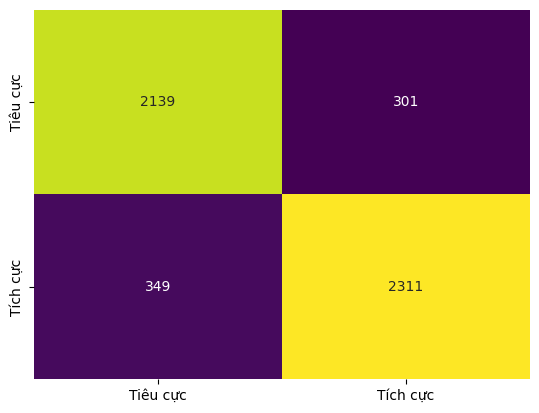

In [22]:
svm_conf_matrix = confusion_matrix(SVM_predictions, y_dev)
sns.heatmap(svm_conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Tiêu cực", "Tích cực"], yticklabels=["Tiêu cực", "Tích cực"])

In [23]:
result_df_SVM = pd.DataFrame({
    'text': X_dev,
    'true_label': y_dev,
    'predicted_label': SVM_predictions
})
result_df_SVM.head(10)

,text,true_label,predicted_label
18172,There is something special about the Austrian ...,positive,positive
10368,For those who are too young to know this or fo...,negative,negative
24841,"My friends and I rented this for ""Bad Movie Ni...",negative,negative
20763,I guess my husband and I are a little slow. We...,positive,positive
35087,Obviously made to show famous 1950s stripper M...,negative,negative
9266,"Shot entirely on location in Bulgaria, The Man...",positive,positive
37273,"This movie is a absolute masterpiece!, 'Tromeo...",positive,positive
10986,I went in to this movie thinking it was going ...,negative,negative
36311,"<br /><br />Ok, well I rented this movie while...",negative,negative
22969,"**SPOILERS**KHAMOSH is totally unrealistic, la...",negative,negative


In [24]:
example = "the cgi is so amazing, but the plot twtist is very excelent."
vector = vectorizer.transform([example]).toarray()
result = SVM_classifier.predict(vector)
print("Sentiment: ", result)

Sentiment:  ['positive']


---
## Save Models
---

In [25]:
joblib.dump(ridge_classifier, 'ml_models/ridge_model.pkl')

joblib.dump(SVM_classifier, 'ml_models/svm_model.pkl')

['ml_models/svm_model.pkl']

In [30]:
x_test_tfidf = vectorizer.transform(X_test.tolist()).toarray()

In [31]:
ridge_model = joblib.load("ml_models/ridge_model.pkl")

ridge_predictions = ridge_model.predict(x_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, ridge_predictions))

ridge_accuracy = accuracy_score(y_test, ridge_predictions)
ridge_precision = precision_score(y_test, ridge_predictions, average="weighted")
ridge_recall = recall_score(y_test, ridge_predictions, average="weighted")
ridge_f1 = f1_score(y_test, ridge_predictions, average="weighted")

print("Accuracy: ", ridge_accuracy)
print("Precision: ", ridge_precision)
print("Recall: ", ridge_recall)
print("F1-Score: ", ridge_f1)

Confusion Matrix:
[[4040  883]
 [ 772 4205]]
Accuracy:  0.8328282828282828
Precision:  0.8329753112394827
Recall:  0.8328282828282828
F1-Score:  0.8327970349890581


In [32]:
svm_model = joblib.load("ml_models/svm_model.pkl")

svm_predictions = svm_model.predict(x_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average="weighted")
svm_recall = recall_score(y_test, svm_predictions, average="weighted")
svm_f1 = f1_score(y_test, svm_predictions, average="weighted")

print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-Score: ", svm_f1)

Confusion Matrix:
[[4262  661]
 [ 499 4478]]
Accuracy:  0.8828282828282829
Precision:  0.88321797189866
Recall:  0.8828282828282829
F1-Score:  0.8827864296966943
